Read 156060 phrases, using 2000 random phrases
['was .', '2']
['very few', '2']
['biting', '2']
['A light ,', '2']
['are more silly than scary', '1']
['It never rises to its clever what-if concept .', '1']
['reeking of research library dust', '1']
['view', '2']
['the slack complacency', '1']
["for Carvey 's glory days", '2']
Top 10 Trigrams:


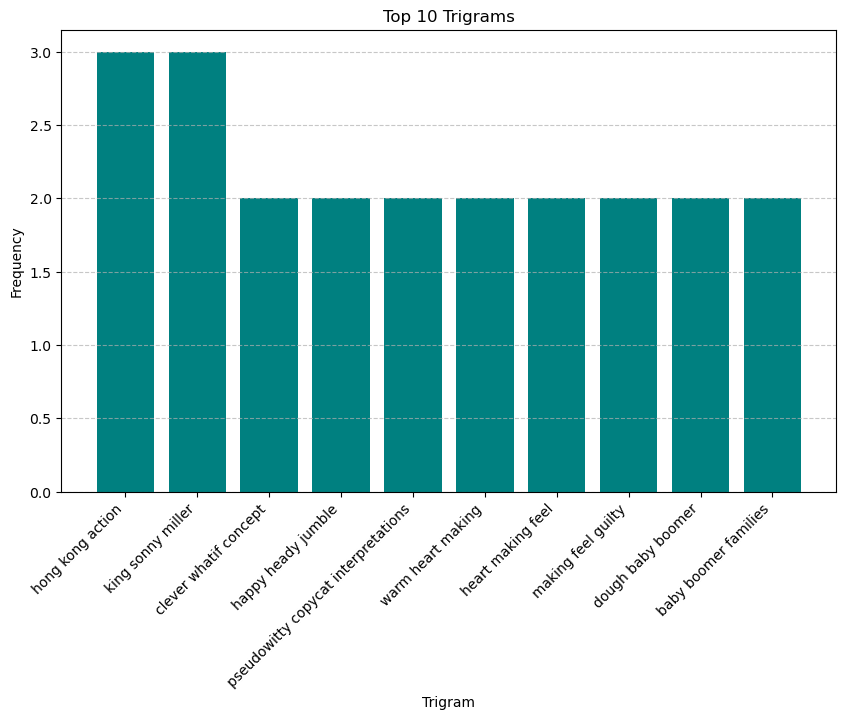

Top Trigrams with Frequencies: [(('hong', 'kong', 'action'), 3), (('king', 'sonny', 'miller'), 3), (('clever', 'whatif', 'concept'), 2), (('happy', 'heady', 'jumble'), 2), (('pseudowitty', 'copycat', 'interpretations'), 2), (('warm', 'heart', 'making'), 2), (('heart', 'making', 'feel'), 2), (('making', 'feel', 'guilty'), 2), (('dough', 'baby', 'boomer'), 2), (('baby', 'boomer', 'families'), 2)]


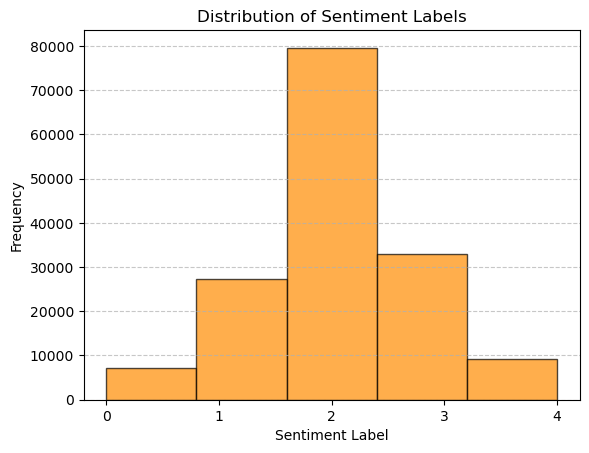

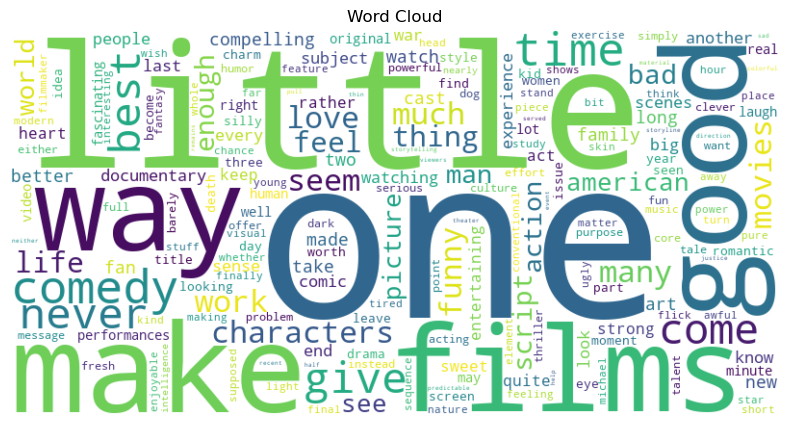

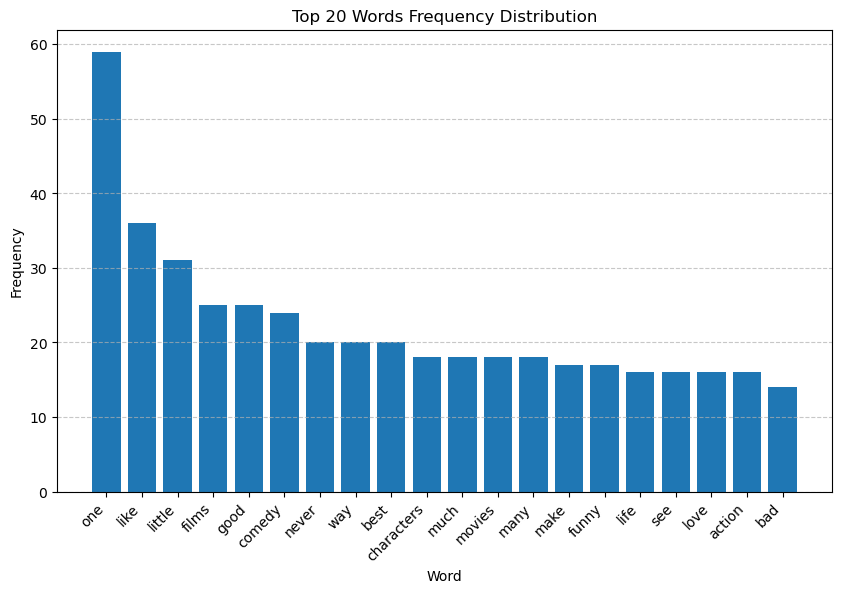

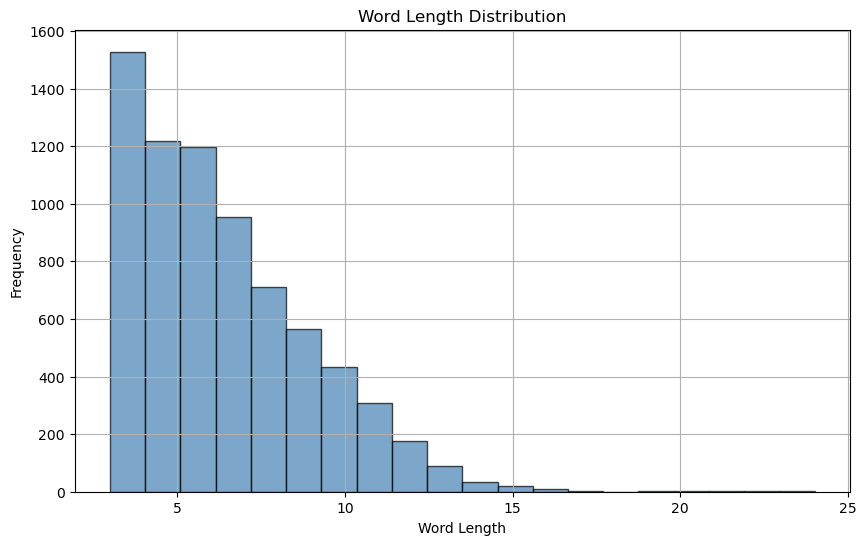

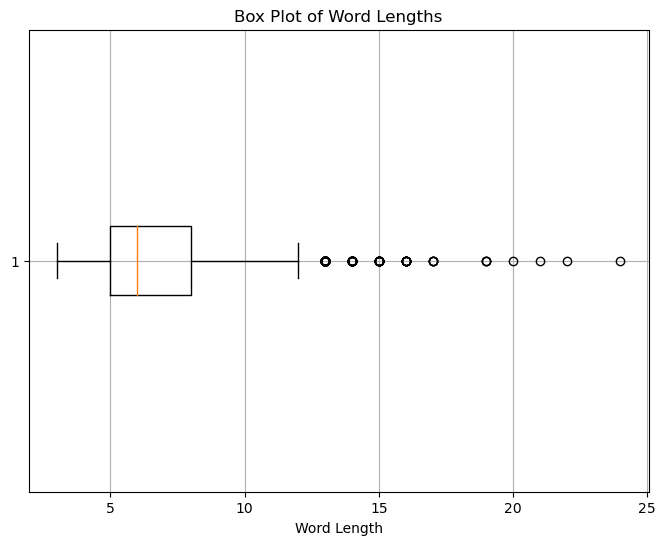

Cross Validation for all features(unfiltered) : 
 

 Unigram Unfiltered : 
Each fold size: 400
Fold 0
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.159      0.302      0.208
2 	      0.921      0.570      0.704
3 	      0.190      0.364      0.250
4 	      0.034      0.250      0.061
Fold 1
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.188      0.261      0.218
2 	      0.883      0.603      0.717
3 	      0.194      0.383      0.257
4 	      0.083      0.500      0.143
Fold 2
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.203      0.271      0.232
2 	      0.861      0.582      0.695
3 	      0.168      0.356      0.229
4 	      0.038      0.111      0.057
Fold 3
	Precision	Recall		F1
0 	      0.000      0.000      0.000
1 	      0.221      0.425      0.291
2 	      0.902      0.550      0.683
3 	      0.163      0.314      0.215
4 	      0.037      0.167      0.061
Fold 4
	Precision	Recall		F1
0 	      0.000      

In [163]:
    
    import os
    import sys
    import random
    from xml.sax.handler import feature_external_ges
    import nltk
    import re
    from nltk.corpus import stopwords
    import sentiment_read_subjectivity
    import sentiment_read_LIWC_pos_neg_words
    import crossval
    from nltk.metrics import ConfusionMatrix
    from nltk.collocations import *
    import sklearn
    from nltk.classify.scikitlearn import SklearnClassifier
    import matplotlib.pyplot as plt
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    import pandas as pd
    import matplotlib.pyplot as plt
    from nltk import FreqDist
    from nltk.collocations import BigramCollocationFinder
    from nltk.metrics import BigramAssocMeasures
    from nltk.collocations import TrigramCollocationFinder
    from nltk.metrics import TrigramAssocMeasures
    import matplotlib.pyplot as plt
    
    
    
    
    
    
    
    
    
    
    
    
    
    
# Import the default list of stopwords from NLTK
default_stopwords = nltk.corpus.stopwords.words('english')

# Custom stopwords
custom_stopwords = [
    "could", "would", "might", "must", "need", "shall", "wo", "sha", "y", "'s", "'d", "'ll",
    "'t", "'m", "'re", "'ve", "n't", "'i", "not", "no", "cannot", "can't", "didn't", "doesn't", "isn't",
    "aren't", "wasn't", "weren't", "won't", "don't", "haven't", "hasn't", "hadn't", "shouldn't", "wouldn't",
    "actually", "also", "always", "even", "ever", "just", "really", "still", "yet", "however", "though",
    "nevertheless", "furthermore", "therefore", "otherwise", "meanwhile", "although", "thus", "hence", "indeed",
    "perhaps", "especially", "specifically", "usually", "often", "sometimes", "certainly", "typically", "mostly",
    "generally", "about", "above", "across", "after", "against", "among", "around", "before", "behind", "below",
    "beneath", "beside", "between", "beyond", "inside", "outside", "through", "under", "upon", "within", "without",
    "again", "almost", "already", "alone", "anyway", "anywhere", "elsewhere", "henceforth", "hereby", "herein",
    "hereafter", "hereupon", "thereby", "therein", "thereafter", "thereupon", "whereupon", "whereby", "whenever",
    "whatever", "whoever", "whosoever", "whomever", "ourselves", "yourselves", "itself", "themselves", "someone",
    "something", "anyone", "anything", "everyone", "everything", "nothing", "nobody", "somewhere", "everywhere","lrb", "rrb"
]

# Add new stopwords for sentiment and movie reviews context
additional_stopwords = [
    "movie", "film", "scene", "story", "character", "plot", "performance", "review", "rating",
    "audience", "actor", "director", "cinema", "entertainment", "dialogue", "viewer", "show", "series"
]
    
    
    # initialize the positive, neutral and negative word lists
    (positivelist, neutrallist, negativelist) = sentiment_read_subjectivity.read_subjectivity_three_types('/Users/iamktrisal/Desktop/NLP Proj/kagglemoviereviews/SentimentLexicons/subjclueslen1-HLTEMNLP05.tff')
    
    
    # initialize positve and negative word prefix lists from extract_liwc_features 
    (poslist, neglist) = sentiment_read_LIWC_pos_neg_words.read_words()
    
    dpath = '/Users/iamktrisal/Desktop/NLP Proj/kagglemoviereviews/SentimentLexicons/subjclueslen1-HLTEMNLP05.tff'
    SL = sentiment_read_subjectivity.readSubjectivity(dpath)
    
    #Defining preprocess_text function
    def preprocess_text(line):
     # Convert text to lowercase
      tokens = re.split(r'\s+', line.lower())
    # Remove punctuation
      punctuation_pattern = re.compile(r'[!#$%&()*+,"-./:;<=>?@[\]^_`{|}~]')
      cleaned_tokens = [punctuation_pattern.sub("", i) for i in tokens]
    # Combine default, custom, and additional stopwords
      stop_words = set(stopwords.words('english')).union(set(custom_stopwords)).union(set(additional_stopwords))
    # Remove stopwords
      filtered_tokens = [token for token in cleaned_tokens if token not in stop_words]
      processed_line = " ".join(filtered_tokens)
      return processed_line
    
    def filter_tokens_by_length(t):
      tokens=[]
      for n in t[0]:
        if len(n)>2:
          tokens.append(n)
      return (tokens,t[1])
    
    
    
    
    # Different Functions for feature sets :
    
    def get_top_words(tokens,i):
      tokens = nltk.FreqDist(tokens)
      wf = [cleaned_tokens for (cleaned_tokens,c) in tokens.most_common(i)]
      return wf   
    
    def create_unigram_features(d,wf):
      df= set(d)
      f = {}
      for word in wf:
        f['V_%s'% word] = (word in df)
      return f
    
    
    def extract_top_bigrams(wordlist,n):
      bigram_measure = nltk.collocations.BigramAssocMeasures()
      finder = BigramCollocationFinder.from_words(wordlist)
      finder.apply_freq_filter(2)
      b_features = finder.nbest(bigram_measure.chi_sq,4000)
      return b_features[:n]





    def extract_and_visualize_top_trigrams(tokens, top_n=10):

    # Extract trigrams
      trigram_measures = TrigramAssocMeasures()
      finder = TrigramCollocationFinder.from_words(tokens)
      finder.apply_freq_filter(2)  # Minimum frequency of trigrams
      trigram_freq = finder.ngram_fd.items()
      sorted_trigrams = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:top_n]


     # Prepare data for visualization
      trigrams, frequencies = zip(*sorted_trigrams)

    # Visualize the top trigrams
      plt.figure(figsize=(10, 6))
      plt.bar([' '.join(t) for t in trigrams], frequencies, color='teal')
      plt.xticks(rotation=45, ha='right')
      plt.xlabel('Trigram')
      plt.ylabel('Frequency')
      plt.title(f'Top {top_n} Trigrams')
      plt.grid(axis='y', linestyle='--', alpha=0.7)
      plt.show()


      return sorted_trigrams




    
    
    def extract_combined_features(doc,word_features,bigram_feature):
      dw = set(doc)
      db = nltk.bigrams(doc)
      features = {}
    
      for word in word_features:
        features['V_{}'.format(word)] = (word in dw)
      
      for b in bigram_feature:
        features['B_{}_{}'.format(b[0],b[1])] = (b in db)
    
      return features
    
    
    def extract_pos_features(document, word_features):
        document_words = set(document)
        tagged_words = nltk.pos_tag(document)
        features = {}
        for word in word_features:
            features['contains({})'.format(word)] = (word in document_words)
        numNoun = 0
        numVerb = 0
        numAdj = 0
        numAdverb = 0
        for (word, tag) in tagged_words:
            if tag.startswith('N'): numNoun += 1
            if tag.startswith('V'): numVerb += 1
            if tag.startswith('J'): numAdj += 1
            if tag.startswith('R'): numAdverb += 1
        features['nouns'] = numNoun
        features['verbs'] = numVerb
        features['adjectives'] = numAdj
        features['adverbs'] = numAdverb
        return features
    
     




    def extract_subjectivity_features(document, word_features, SL):
        document_words = set(document)
        features = {}
        for word in word_features:
            features['V_{}'.format(word)] = (word in document_words)
        # count variables for the 4 classes of subjectivity
        weakPos = 0
        strongPos = 0
        weakNeg = 0
        strongNeg = 0
        for word in document_words:
            if word in SL:
                strength, posTag, isStemmed, polarity = SL[word]
                if strength == 'weaksubj' and polarity == 'positive':
                    weakPos += 1
                if strength == 'strongsubj' and polarity == 'positive':
                    strongPos += 1
                if strength == 'weaksubj' and polarity == 'negative':
                    weakNeg += 1
                if strength == 'strongsubj' and polarity == 'negative':
                    strongNeg += 1
                features['positivecount'] = weakPos + (2 * strongPos)
                features['negativecount'] = weakNeg + (2 * strongNeg) 
    
        if 'positivecount' not in features:
          features['positivecount'] = 0
        if 'negativecount' not in features:
          features['negativecount'] = 0
    
        return features
    
    
    def extract_liwc_features(doc,word_features,poslist,neglist):
      doc_words = set(doc)
      features= {}
    
      for word in word_features:
        features['contains({})'.format(word)] = (word in doc_words)
      
      pos = 0
      neg = 0
      for word in doc_words:
        if sentiment_read_LIWC_pos_neg_words.isPresent(word,poslist):
          pos+=1
        elif sentiment_read_LIWC_pos_neg_words.isPresent(word,neglist):
          neg+=1
        features ['positivecount'] = pos
        features ['negativecount'] = neg
    
    
      if 'positivecount' not in features:
        features['positivecount'] = 0
      if 'negativecount' not in features:
        features['negativecount'] = 0
    
      return features
    
    
    def extract_combined_features(doc,word_features,SL,poslist,neglist):
      doc_words = set(doc)
      features={}
    
      for word in word_features:
        features['contains({})'.format(word)] = (word in doc_words )
      
      weakPos = 0
      strongPos = 0
      weakNeg = 0
      strongNeg = 0
      for word in doc_words:
        if sentiment_read_LIWC_pos_neg_words.isPresent(word,poslist):
          strongPos +=1
        elif sentiment_read_LIWC_pos_neg_words.isPresent(word,neglist):
          strongNeg +=1
        elif word in SL:
          strength, posTag, isStemmed, polarity = SL[word]
          if strength == 'weaksubj' and polarity == 'positive':
            weakPos += 1
          if strength == 'strongsubj' and polarity == 'positive':
            strongPos += 1
          if strength == 'weaksubj' and polarity == 'negative':
            weakNeg += 1
          if strength == 'strongsubj' and polarity == 'negative':
            strongNeg += 1
        features['positivecount'] = weakPos + (2 * strongPos)
        features['negativecount'] = weakNeg + (2 * strongNeg)
    
      if 'positivecount' not in features:
        features['positivecount'] = 0
      if 'negativecount' not in features:
        features['negativecount'] = 0
    
      return features    
    
    
    
    # Save feature sets
    def save_features_to_file(features, path):
        f = open(path, 'w')
        featurenames = features[0][0].keys()
        fnameline = ''
        for fname in featurenames:
            fname = fname.replace(',','COM')
            fname = fname.replace("'","SQ")
            fname = fname.replace('"','DQ')
            fnameline += fname + ','
        fnameline += 'Level'
        f.write(fnameline)
        f.write('\n')
        for fset in features:
            featureline = ''
            for key in featurenames:
                # Check if the key exists in the feature set
                if key in fset[0]:
                    featureline += str(fset[0][key]) + ','
                else:
                    featureline += 'NA,'  # If the key does not exist, write 'NA' instead
            if fset[1] == 0:
              featureline += str("Less Negitive")
            elif fset[1] == 1:
              featureline += str("Strong negitive")
            elif fset[1] == 2:
              featureline += str("Neutral")
            elif fset[1] == 3:
              featureline += str("Strongly positive")
            elif fset[1] == 4:
              featureline += str("Less positive")
            f.write(featureline)
            f.write('\n')
        f.close()
    
    
    
    def evaluate_naive_bayes_accuracy(features):
      train_set,test_set = features[int(0.1*len(features)):], features[:int(0.1*len(features))]
      classifier = nltk.NaiveBayesClassifier.train(train_set)
      print("\nAccuracy : ")
      print(nltk.classify.accuracy(classifier,test_set),"\n")
      l1 = []
      tl=[]
      for (features,label) in test_set:
        l1.append(label)
        tl.append(classifier.classify(features))
      print(ConfusionMatrix(l1,tl))
    
    
    
    
    def evaluate_decision_tree(featuresets):
        n = 0.1
        cutoff = int(n * len(featuresets))
        train_set, test_set = featuresets[cutoff:], featuresets[:cutoff]
        classifier_dt = SklearnClassifier(DecisionTreeClassifier())
        classifier_dt.train(train_set)
        print("Classifier-DecisionTree \n")
        print("Accuracy : ", nltk.classify.accuracy(classifier_dt, test_set))
    
    
    
    
    
    
    
    def evaluate_svm_classifier(featuresets):
        n = 0.1
        cutoff = int(n * len(featuresets))
        train_set, test_set = featuresets[cutoff:], featuresets[:cutoff]
        classifier_svm = SklearnClassifier(SVC())
        classifier_svm.train(train_set)
        print("Classifier-evaluate_svm_classifier \n")
        print("Accuracy : ", nltk.classify.accuracy(classifier_svm, test_set))
        
        
    
    def evaluate_random_forest(featuresets):
        n = 0.1
        cutoff = int(n * len(featuresets))
        train_set, test_set = featuresets[cutoff:], featuresets[:cutoff]
        classifier_rf = SklearnClassifier(RandomForestClassifier())
        classifier_rf.train(train_set)
        print("Classifier - Random Forest \n")
        print("Accuracy:", nltk.classify.accuracy(classifier_rf, test_set))
    
    
    

    
    def visualize_sentiment_distribution(phrasedata):
        sentiments = [int(phrase[1]) for phrase in phrasedata]
        plt.hist(sentiments, bins=5, color='darkorange', edgecolor='black', alpha=0.7)
        plt.xlabel('Sentiment Label')
        plt.ylabel('Frequency')
        plt.title('Distribution of Sentiment Labels')
        plt.xticks(range(0, 5))
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    
    def visualize_word_frequency(tokens):
        freq_dist = nltk.FreqDist(tokens)
        plt.figure(figsize=(10, 6))
        freq_dist.plot(30, cumulative=False)
        plt.xlabel('Word')
        plt.ylabel('Frequency')
        plt.title('Word Frequency Distribution')
        plt.grid(True)
        plt.show()
    
    
    def visualize_top_words(tokens, n=20):
        freq_dist = nltk.FreqDist(tokens)
        top_n = freq_dist.most_common(n)
        words, frequencies = zip(*top_n)
        plt.figure(figsize=(10, 6))
        plt.bar(words, frequencies)
        plt.xlabel('Word')
        plt.ylabel('Frequency')
        plt.title(f'Top {n} Words Frequency Distribution')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    
    
    
    
    def create_wordcloud(tokens):
        text = ' '.join(tokens)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud')
        plt.show()    
    
    

    
    def visualize_word_length_distribution(tokens):
        word_lengths = [len(word) for word in tokens]
        plt.figure(figsize=(10, 6))
        plt.hist(word_lengths, bins=20, color='steelblue', edgecolor='black', alpha=0.7)
        plt.xlabel('Word Length')
        plt.ylabel('Frequency')
        plt.title('Word Length Distribution')
        plt.grid(True)
        plt.show()
    
    def visualize_word_length_boxplot(tokens):
        word_lengths = [len(word) for word in tokens]
        plt.figure(figsize=(8, 6))
        plt.boxplot(word_lengths, vert=False)
        plt.xlabel('Word Length')
        plt.title('Box Plot of Word Lengths')
        plt.grid(True)
        plt.show()

    
    




    
    
    # function to read kaggle training file, train and test tokens classifier 
    def process_kaggle_data(dirPath,limitStr):
      # convert the limit argument from tokens string to an int
      limit = int(limitStr)
      
      os.chdir(dirPath)
      
      f = open('/Users/iamktrisal/Desktop/NLP Proj/kagglemoviereviews/corpus/train.tsv', 'r')
      # loop over lines in the file and use the first limit of them
      phrasedata = []
      for line in f:
    
        # ignore the first line starting with Phrase and read all lines
        if (not line.startswith('Phrase')):
          # remove final end of line character
          line = line.strip()
          # each line has 4 items separated by tabs
          # ignore th
          # e phrase and sentence ids, and keep the phrase and sentiment
          phrasedata.append(line.split('\t')[2:4])
    
      
      # pick tokens random sample of length limit because of phrase overlapping sequences
      random.shuffle(phrasedata)
      phraselist = phrasedata[:limit]
    
      print('Read', len(phrasedata), 'phrases, using', len(phraselist), 'random phrases')
    
      for phrase in phraselist[:10]:
        print (phrase)
      
      
      withpreprocessing = []
      withoutpreprocessing= []
     
      for punctuation_pattern in phraselist:
    
       
        tokens = nltk.word_tokenize(punctuation_pattern[0])
        withoutpreprocessing.append((tokens, int(punctuation_pattern[1])))
    
        
        punctuation_pattern[0] = preprocess_text(punctuation_pattern[0])
        tokens = nltk.word_tokenize(punctuation_pattern[0])
        withpreprocessing.append((tokens, int(punctuation_pattern[1])))
      
       
      withpreprocessing_filter=[]
      
      for punctuation_pattern in withpreprocessing:
        withpreprocessing_filter.append(filter_tokens_by_length(punctuation_pattern))
    
      filtered_tokens =[]
      unfiltered_tokens = []
      for (d,s) in  withpreprocessing_filter:
        for i in d:
          filtered_tokens.append(i)
    
      for (d,s) in withoutpreprocessing:
        for i in d:
          unfiltered_tokens.append(i)
    
   # Extract and display the top 10 trigrams
      print("Top 10 Trigrams:")
      top_trigrams = extract_and_visualize_top_trigrams(filtered_tokens, top_n=10)
      print("Top Trigrams with Frequencies:", top_trigrams)  

        
      visualize_sentiment_distribution(phrasedata)
      create_wordcloud(filtered_tokens)
      visualize_top_words(filtered_tokens)
      visualize_word_length_distribution(filtered_tokens)
      visualize_word_length_boxplot(filtered_tokens)
      
      
    
      
      # feature sets
    
      filtered_bow_features = get_top_words(filtered_tokens,350)
      unfiltered_bow_features = get_top_words(unfiltered_tokens,350)
    
      filtered_unigram_features = [(create_unigram_features(d,filtered_tokens),s) for (d,s) in withpreprocessing_filter]
      unfiltered_unigram_features = [(create_unigram_features(d,unfiltered_tokens),s) for (d,s) in withoutpreprocessing]
    
      filtered_bigram_features = [(extract_combined_features(d, filtered_bow_features, SL, poslist, neglist), s) for (d, s) in withpreprocessing_filter]
      unfiltered_bigram_features = [(extract_combined_features(d, unfiltered_bow_features, SL, poslist, neglist), s)for (d, s) in withoutpreprocessing]
        
      filtered_pos_features = [(extract_pos_features(d,filtered_bow_features),s) for (d,s) in withpreprocessing_filter]
      unfiltered_pos_features = [(extract_pos_features(d,unfiltered_bow_features),s) for (d,s) in withoutpreprocessing]
    
      
    
      filtered_sl_features = [(extract_subjectivity_features(d, filtered_bow_features, SL), c) for (d, c) in withpreprocessing_filter]
      unfiltered_sl_features = [(extract_subjectivity_features(d, unfiltered_bow_features, SL), c) for (d, c) in withoutpreprocessing]
    
    
      filtered_liwc_features = [(extract_liwc_features(d, filtered_bow_features, poslist,neglist), c) for (d, c) in withpreprocessing_filter]
      unfiltered_liwc_features = [(extract_liwc_features(d, unfiltered_bow_features, poslist,neglist), c) for (d, c) in withoutpreprocessing]
    
      filtered_combo_features =  [(extract_combined_features(d, filtered_bow_features,SL, poslist,neglist), c) for (d, c) in withpreprocessing_filter]
      unfiltered_combo_features = [(extract_combined_features(d, unfiltered_bow_features,SL, poslist,neglist), c) for (d, c) in withoutpreprocessing]
    
    
    
      #Saving features
      
      save_features_to_file(filtered_unigram_features,'filtered_unigram.csv')
      save_features_to_file(unfiltered_unigram_features,'unfiltered_unigram.csv')
    
      save_features_to_file(filtered_bigram_features,'filtered_bigram.csv')
      save_features_to_file(unfiltered_bigram_features,'unfiltered_bigram.csv')
    
      save_features_to_file(filtered_pos_features,'filtered_pos.csv')
      save_features_to_file(unfiltered_pos_features,'unfiltered_pos.csv')
    
     
    
      save_features_to_file(filtered_sl_features,'filtered_sl.csv')
      save_features_to_file(unfiltered_sl_features,'unfiltered_sl.csv')
    
      save_features_to_file(filtered_liwc_features,'filtered_liwc.csv')
      save_features_to_file(unfiltered_liwc_features,'unfiltered_liwc.csv')
    
      save_features_to_file(filtered_combo_features,'filtered_combo.csv')
      save_features_to_file(unfiltered_combo_features,'unfiltered_combo.csv')
      
    
    
      # train classifier and show performance in cross-validation
    
      labels = [0,1,2,3,4]
      print("Cross Validation for all features(unfiltered) : \n ")
    
      print("\n Unigram Unfiltered : ")
      crossval.cross_validation_PRF(5,unfiltered_unigram_features,labels)
      print("\n Bigram Unfiltered : ")
      crossval.cross_validation_PRF(5,unfiltered_bigram_features,labels)
      print("\n Pos Unfiltered : ")
      crossval.cross_validation_PRF(5,unfiltered_pos_features,labels)
      print("\n SL Unfiltered : ")
      crossval.cross_validation_PRF(5,unfiltered_sl_features,labels)
      print("\n extract_liwc_features Unfiltered : ")
      crossval.cross_validation_PRF(5,unfiltered_liwc_features,labels)
      print("\n Combined SL extract_liwc_features Unfiltered : ")
      crossval.cross_validation_PRF(5,unfiltered_combo_features,labels)
    
      print("\n Unigram filtered : ")
      crossval.cross_validation_PRF(5,filtered_unigram_features,labels)
      print("\n Bigram filtered : ")
      crossval.cross_validation_PRF(5,filtered_bigram_features,labels)
      print("\n Pos filtered : ")
      crossval.cross_validation_PRF(5,filtered_pos_features,labels)
      print("\n SL filtered : ")
      crossval.cross_validation_PRF(5,filtered_sl_features,labels)
      print("\n extract_liwc_features filtered : ")
      crossval.cross_validation_PRF(5,filtered_liwc_features,labels)
      print("\n Combined SL extract_liwc_features filtered: ")
      crossval.cross_validation_PRF(5,filtered_combo_features,labels)
    
    
    
      print("\n Unigram Unfiltered : ")
      evaluate_naive_bayes_accuracy(unfiltered_unigram_features)
      print("\n Bigram Unfiltered : ")
      evaluate_naive_bayes_accuracy(unfiltered_bigram_features)
      print("\n Pos Unfiltered : ")
      evaluate_naive_bayes_accuracy(unfiltered_pos_features)
      print("\n SL Unfiltered : ")
      evaluate_naive_bayes_accuracy(unfiltered_sl_features)
      print("\n extract_liwc_features Unfiltered : ")
      evaluate_naive_bayes_accuracy(unfiltered_liwc_features)
      print("\n Combined SL extract_liwc_features Unfiltered : ")
      evaluate_naive_bayes_accuracy(unfiltered_combo_features)
    
    
      print("\n Unigram filtered : ")
      evaluate_naive_bayes_accuracy(filtered_unigram_features)
      print("\n Bigram filtered : ")
      evaluate_naive_bayes_accuracy(filtered_bigram_features)
      print("\n Pos filtered : ")
      evaluate_naive_bayes_accuracy(filtered_pos_features)
      print("\n SL filtered : ")
      evaluate_naive_bayes_accuracy(filtered_sl_features)
      print("\n extract_liwc_features filtered : ")
      evaluate_naive_bayes_accuracy(filtered_liwc_features)
      print("\n Combined SL extract_liwc_features filtered : ")
      evaluate_naive_bayes_accuracy(filtered_combo_features)
    
      print("--------------------------------------------------For desicion tree -----------------------------------------------")
      print("\n Unigram Unfiltered : ")
      evaluate_decision_tree(unfiltered_unigram_features)
      print("\n Bigram Unfiltered : ")
      evaluate_decision_tree(unfiltered_bigram_features)
      print("\n Pos Unfiltered : ")
      evaluate_decision_tree(unfiltered_pos_features)
      print("\n SL Unfiltered : ")
      evaluate_decision_tree(unfiltered_sl_features)
      print("\n extract_liwc_features Unfiltered : ")
      evaluate_decision_tree(unfiltered_liwc_features)
      print("\n Combined SL extract_liwc_features Unfiltered : ")
      evaluate_decision_tree(unfiltered_combo_features)
    
      print("===== for filtered =====")
    
    
      print("\n Unigram filtered : ")
      evaluate_decision_tree(filtered_unigram_features)
      print("\n Bigram filtered : ")
      evaluate_decision_tree(filtered_bigram_features)
      print("\n Pos filtered : ")
      evaluate_decision_tree(filtered_pos_features)
      print("\n SL filtered : ")
      evaluate_decision_tree(filtered_sl_features)
      print("\n extract_liwc_features filtered : ")
      evaluate_decision_tree(filtered_liwc_features)
      print("\n Combined SL extract_liwc_features filtered : ")
      evaluate_decision_tree(filtered_combo_features)
    
    
      
    
    
    
      print("--------------------------------------------------For evaluate_svm_classifier -----------------------------------------------")
      print("\n Unigram Unfiltered : ")
      evaluate_svm_classifier(unfiltered_unigram_features)
      print("\n Bigram Unfiltered : ")
      evaluate_svm_classifier(unfiltered_bigram_features)
      print("\n Pos Unfiltered : ")
      evaluate_svm_classifier(unfiltered_pos_features)
      print("\n SL Unfiltered : ")
      evaluate_svm_classifier(unfiltered_sl_features)
      print("\n extract_liwc_features Unfiltered : ")
      evaluate_svm_classifier(unfiltered_liwc_features)
      print("\n Combined SL extract_liwc_features Unfiltered : ")
      evaluate_svm_classifier(unfiltered_combo_features)
    
      print("===== for filtered =====")
    
    
      print("\n Unigram filtered : ")
      evaluate_svm_classifier(filtered_unigram_features)
      print("\n Bigram filtered : ")
      evaluate_svm_classifier(filtered_bigram_features)
      print("\n Pos filtered : ")
      evaluate_svm_classifier(filtered_pos_features)
      print("\n SL filtered : ")
      evaluate_svm_classifier(filtered_sl_features)
      print("\n extract_liwc_features filtered : ")
      evaluate_svm_classifier(filtered_liwc_features)
      print("\n Combined SL extract_liwc_features filtered : ")
      evaluate_svm_classifier(filtered_combo_features)
    
    
    
      
      
     
    
      print("--------------------------------------------------For random forest-----------------------------------------------")
      print("\n Unigram Unfiltered : ")
      evaluate_random_forest(unfiltered_unigram_features)
      print("\n Bigram Unfiltered : ")
      evaluate_random_forest(unfiltered_bigram_features)
      print("\n Pos Unfiltered : ")
      evaluate_random_forest(unfiltered_pos_features)
      print("\n SL Unfiltered : ")
      evaluate_random_forest(unfiltered_sl_features)
      print("\n extract_liwc_features Unfiltered : ")
      evaluate_random_forest(unfiltered_liwc_features)
      print("\n Combined SL extract_liwc_features Unfiltered : ")
      evaluate_random_forest(unfiltered_combo_features)
    
      print("===== for filtered =====")
    
    
      print("\n Unigram filtered : ")
      evaluate_random_forest(filtered_unigram_features)
      print("\n Bigram filtered : ")
      evaluate_random_forest(filtered_bigram_features)
      print("\n Pos filtered : ")
      evaluate_random_forest(filtered_pos_features)
      print("\n SL filtered : ")
      evaluate_random_forest(filtered_sl_features)
      print("\n extract_liwc_features filtered : ")
      evaluate_random_forest(filtered_liwc_features)
      print("\n Combined SL extract_liwc_features filtered : ")
      evaluate_random_forest(filtered_combo_features)
    
    
     
    
      
    
      
    

    
    
    if __name__ == '__main__':
        kaggle_dir = '/Users/iamktrisal/Desktop/NLP Proj/kagglemoviereviews'  
        limit = 2000  # Adjust the limit to the desired number of phrases to process
        process_kaggle_data(kaggle_dir, limit)
    
    
    
    
    
    
